In [1]:
# Carga de módulos de matplotlib
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Carga de seaborn
import seaborn as sns

# Carga de pandas
import pandas as pd

In [2]:
# Carga de datos generales
covid_general = pd.read_csv("datos/05_30_22_CSV_GENERAL.csv", sep=";")


In [3]:
# Estructura del conjunto de datos
covid_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Columns: 144 entries, FECHA to ARS_SIQ_UCI
dtypes: float64(118), int64(11), object(15)
memory usage: 918.1+ KB


In [4]:
# Datos generales
covid_general

,FECHA,SE,positivos,nue_posi,conf_lab,conf_nexo,muj_posi,hom_posi,extranj_posi,costar_posi,...,CEACOINS_UCI,CEACOINS_SALON,PAUT_UCI,PAUT_SALON,HVITO_UCI,HVITO_SALON,UNICAR_SAL,UNICAR_UCI,ARS-SIQ_SAL,ARS_SIQ_UCI
0,06/03/2020,10,2,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,07/03/2020,10,7,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08/03/2020,11,10,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,09/03/2020,11,12,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/03/2020,11,13,1,NaN,NaN,7.0,6.0,3.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,26/05/2022,21,896712,3499,3272.0,227.0,460886.0,435826.0,102478.0,794234.0,...,0.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0
812,27/05/2022,21,899404,2692,2491.0,201.0,462372.0,437032.0,102727.0,796677.0,...,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0
813,28/05/2022,21,901542,2138,1907.0,231.0,463595.0,437947.0,103010.0,798532.0,...,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0
814,29/05/2022,22,903213,1671,1603.0,68.0,464547.0,438666.0,103241.0,799972.0,...,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0


In [5]:
# Reducción de columnas
covid_general = covid_general[["FECHA", "positivos", "activos", "RECUPERADOS", "fallecidos", 
                               "nue_posi", "nue_falleci", "salon", "UCI"]]

# Cambio de nombre de las columnas a minúsculas y a nombres más claros
covid_general = covid_general.rename(columns={"FECHA": "fecha",
                                              "RECUPERADOS": "recuperados",
                                              "nue_posi": "nuevos_positivos",
                                              "nue_falleci": "nuevos_fallecidos",
                                              "UCI": "uci"})

# Cambio del tipo de datos del campo de fecha
covid_general["fecha"] = pd.to_datetime(covid_general["fecha"], format="%d/%m/%Y")

In [6]:
covid_general

,fecha,positivos,activos,recuperados,fallecidos,nuevos_positivos,nuevos_fallecidos,salon,uci
0,2020-03-06,2,2,0,0,2,0,NaN,NaN
1,2020-03-07,7,7,0,0,5,0,NaN,NaN
2,2020-03-08,10,10,0,0,3,0,NaN,NaN
3,2020-03-09,12,12,0,0,2,0,NaN,NaN
4,2020-03-10,13,13,0,0,1,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
811,2022-05-26,896712,31441,856766,8505,3499,6,322.0,47.0
812,2022-05-27,899404,33124,857772,8508,2692,3,328.0,47.0
813,2022-05-28,901542,34163,858862,8517,2138,9,338.0,44.0
814,2022-05-29,903213,34507,860184,8522,1671,5,334.0,51.0


In [7]:
# Carga de casos positivos
covid_cantonal_positivos = pd.read_csv("datos/05_30_22_CSV_POSITIVOS.csv", 
                                       sep=";", 
                                       encoding="iso-8859-1") # para leer tildes y otros caracteres

# Carga de casos activos
covid_cantonal_activos = pd.read_csv("datos/05_30_22_CSV_ACTIVOS.csv", 
                                     sep=";", 
                                     encoding="iso-8859-1") # para leer tildes y otros caracteres

# Carga de casos recuperados
covid_cantonal_recuperados = pd.read_csv("datos/05_30_22_CSV_RECUP.csv", 
                                         sep=";", 
                                         encoding="iso-8859-1") # para leer tildes y otros caracteres

# Carga de casos fallecidos
covid_cantonal_fallecidos = pd.read_csv("datos/05_30_22_CSV_FALLECIDOS.csv", 
                                        sep=";", 
                                        encoding="iso-8859-1") # para leer tildes y otros caracteres

In [8]:
# Estructura de los conjuntos de datos.
covid_cantonal_positivos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Columns: 811 entries, cod_provin to 30/05/2022
dtypes: float64(809), object(2)
memory usage: 532.3+ KB


In [9]:
# Casos positivos
covid_cantonal_positivos

,cod_provin,provincia,cod_canton,canton,15/03/2020,16/03/2020,17/03/2020,18/03/2020,19/03/2020,20/03/2020,...,21/05/2022,22/05/2022,23/05/2022,24/05/2022,25/05/2022,26/05/2022,27/05/2022,28/05/2022,29/05/2022,30/05/2022
0,1.0,San José,112.0,Acosta,0.0,0.0,0.0,0.0,0.0,0.0,...,3967.0,3974.0,3978.0,4008.0,4012.0,4026.0,4049.0,4054.0,4081.0,4104.0
1,1.0,San José,110.0,Alajuelita,0.0,0.0,0.0,0.0,0.0,0.0,...,18696.0,18711.0,18725.0,18763.0,18802.0,18842.0,18887.0,18918.0,18952.0,18973.0
2,1.0,San José,106.0,Aserrí,0.0,0.0,0.0,0.0,0.0,0.0,...,10680.0,10704.0,10716.0,10729.0,10753.0,10782.0,10812.0,10829.0,10852.0,10880.0
3,1.0,San José,118.0,Curridabat,0.0,0.0,1.0,2.0,3.0,5.0,...,14183.0,14200.0,14216.0,14268.0,14329.0,14382.0,14433.0,14459.0,14486.0,14518.0
4,1.0,San José,103.0,Desamparados,4.0,4.0,4.0,4.0,4.0,5.0,...,42546.0,42611.0,42654.0,42762.0,42843.0,42985.0,43084.0,43147.0,43208.0,43283.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,7.0,Limón,702.0,Pococí,0.0,0.0,0.0,0.0,0.0,0.0,...,20167.0,20196.0,20210.0,20243.0,20268.0,20355.0,20379.0,20410.0,20428.0,20449.0
80,7.0,Limón,703.0,Siquirres,0.0,0.0,0.0,0.0,0.0,0.0,...,10226.0,10235.0,10248.0,10265.0,10271.0,10301.0,10315.0,10328.0,10339.0,10349.0
81,7.0,Limón,704.0,Talamanca,0.0,0.0,0.0,0.0,0.0,0.0,...,5415.0,5415.0,5419.0,5425.0,5429.0,5437.0,5444.0,5457.0,5464.0,5468.0
82,9.0,Otros,999.0,Otros,0.0,0.0,0.0,1.0,1.0,7.0,...,350.0,350.0,350.0,350.0,350.0,351.0,351.0,351.0,351.0,352.0


In [10]:
# Reducción de columnas
covid_cantonal_positivos = covid_cantonal_positivos[["provincia", "canton", "30/05/2022"]]
covid_cantonal_fallecidos = covid_cantonal_fallecidos[["provincia", "canton", "30/05/2022"]]
covid_cantonal_recuperados = covid_cantonal_recuperados[["provincia", "canton", "30/05/2022"]]
covid_cantonal_activos = covid_cantonal_activos[["provincia", "canton", "30/05/2022"]]

# Eliminación de fila con valores nulos
covid_cantonal_positivos = covid_cantonal_positivos.dropna(how='all')
covid_cantonal_fallecidos = covid_cantonal_fallecidos.dropna(how='all')
covid_cantonal_recuperados = covid_cantonal_recuperados.dropna(how='all')
covid_cantonal_activos = covid_cantonal_activos.dropna(how='all')

# Eliminación de fila con canton=="Otros"
covid_cantonal_positivos = covid_cantonal_positivos[covid_cantonal_positivos["canton"] != "Otros"]
covid_cantonal_fallecidos = covid_cantonal_fallecidos[covid_cantonal_fallecidos["canton"] != "Otros"]
covid_cantonal_recuperados = covid_cantonal_recuperados[covid_cantonal_recuperados["canton"] != "Otros"]
covid_cantonal_activos = covid_cantonal_activos[covid_cantonal_activos["canton"] != "Otros"]

# Cambio de nombre de columnas
covid_cantonal_positivos = covid_cantonal_positivos.rename(columns={"30/05/2022": "positivos"})
covid_cantonal_fallecidos = covid_cantonal_fallecidos.rename(columns={"30/05/2022": "fallecidos"})
covid_cantonal_recuperados = covid_cantonal_recuperados.rename(columns={"30/05/2022": "recuperados"})
covid_cantonal_activos = covid_cantonal_activos.rename(columns={"30/05/2022": "activos"})

In [11]:
# Despliegue de los cambios
covid_cantonal_positivos

,provincia,canton,positivos
0,San José,Acosta,4104.0
1,San José,Alajuelita,18973.0
2,San José,Aserrí,10880.0
3,San José,Curridabat,14518.0
4,San José,Desamparados,43283.0
...,...,...,...
77,Limón,Limón,16822.0
78,Limón,Matina,5822.0
79,Limón,Pococí,20449.0
80,Limón,Siquirres,10349.0


In [12]:
# Pasajeros en el conjunto de datos de entrenamiento
titanic = pd.read_csv("datos/entrenamiento.csv")

# Despliegue de los datos
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Text(0, 0.5, 'Frecuencia')

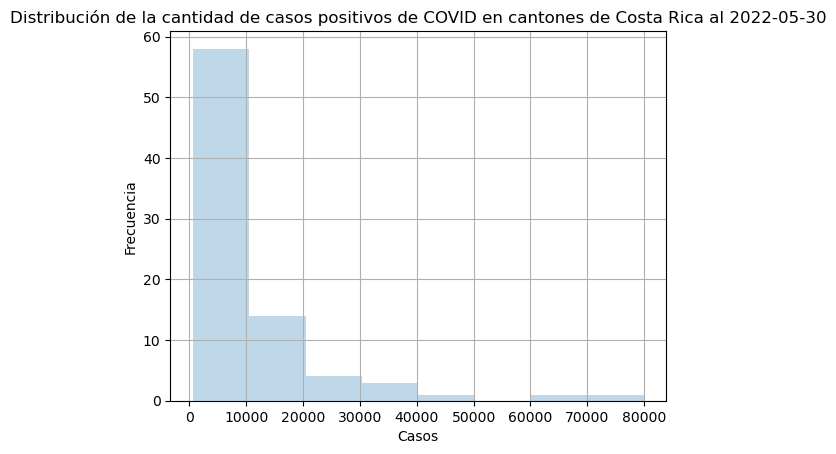

In [13]:
# Histograma de casos positivos en cantones
covid_cantonal_positivos["positivos"].hist(
    bins=8, #cajitas en realidad no son barras
    color="#2c7fb8",
    alpha=0.3) #Transparencia

# Título y etiquetas en los ejes
plt.title("Distribución de la cantidad de casos positivos de COVID en cantones de Costa Rica al 2022-05-30")
plt.xlabel("Casos")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

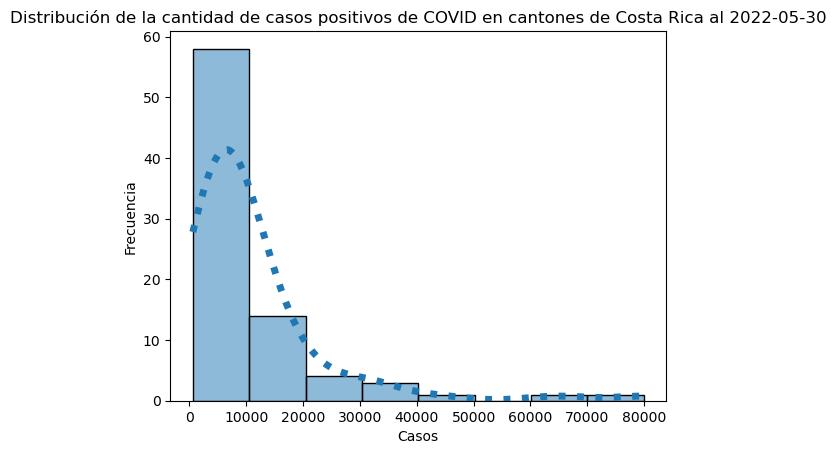

In [14]:
# Histograma y curva de densidad
sns.histplot(data=covid_cantonal_positivos, x="positivos", 
             bins=8, 
             kde=True,
             line_kws={"lw":5, "ls": ":"}) #kde es la curva

# Título y etiquetas en los ejes
plt.title("Distribución de la cantidad de casos positivos de COVID en cantones de Costa Rica al 2022-05-30")
plt.xlabel("Casos")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

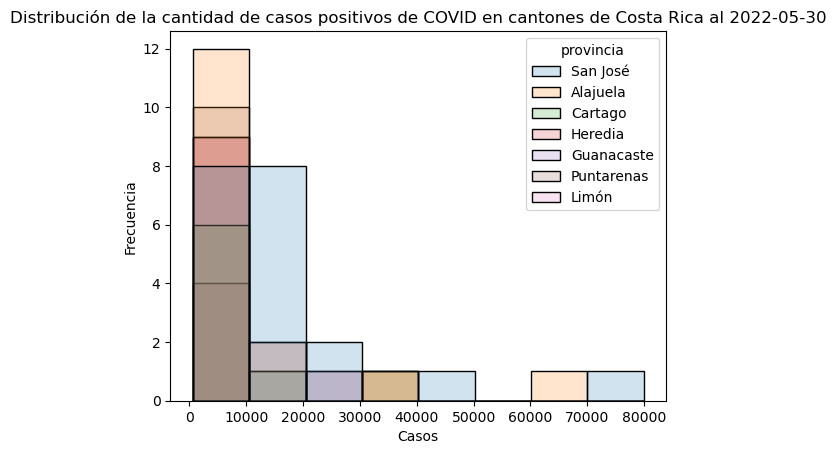

In [15]:
# Histograma con "bins" divididos por provincia 
sns.histplot(data=covid_cantonal_positivos, 
             x="positivos", 
             bins=8, 
             hue="provincia", 
             alpha=0.2)

# Título y etiquetas en los ejes
plt.title("Distribución de la cantidad de casos positivos de COVID en cantones de Costa Rica al 2022-05-30")
plt.xlabel("Casos")
plt.ylabel("Frecuencia")

## Histograma TITANIC

Text(0, 0.5, 'Frecuencia')

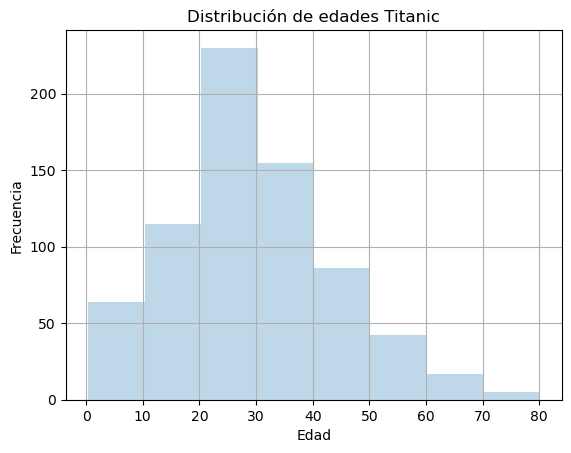

In [16]:
# Histograma 
titanic["Age"].hist(
    bins=8, #cajitas en realidad no son barras
    color="#2c7fb8",
    alpha=0.3) #Transparencia

# Título y etiquetas en los ejes
plt.title("Distribución de edades Titanic")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

In [25]:
# Histograma titanic edad
sns.histplot(data=titanic, x="Age", y, 
             bins=8, 
             kde=True,
             line_kws={"lw":5, "ls": ":"})# kde es la curva

# Título y etiquetas en los ejes
plt.title("Distribución de edades Titanic")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

SyntaxError: positional argument follows keyword argument (1704851078.py, line 5)

Text(0, 0.5, 'Frecuencia')

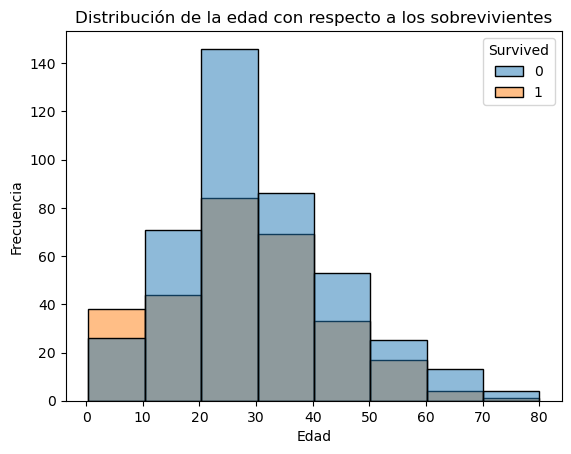

In [18]:
# Histograma edad y supervivencia
sns.histplot(data=titanic, 
             x="Age",
             bins=8, 
             hue="Survived", 
             alpha=0.5)

# Título y etiquetas en los ejes
plt.title("Distribución de la edad con respecto a los sobrevivientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

In [ ]:
titanic

Text(0, 0.5, 'Count')

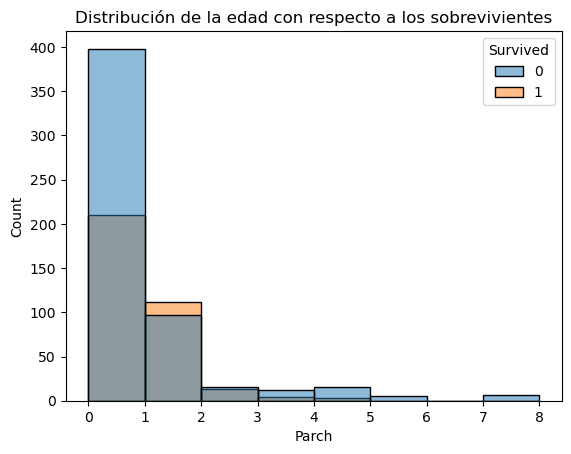

In [19]:
# Histograma edad y supervivencia
sns.histplot(data=titanic, 
             x="SibSp",
             bins=8,
             hue="Survived", 
             alpha=0.5)

# Título y etiquetas en los ejes
plt.title("Distribución de la edad con respecto a los sobrevivientes")
plt.xlabel("Parch")
plt.ylabel("Count")

## Boxplot

Text(0, 0.5, 'Casos')

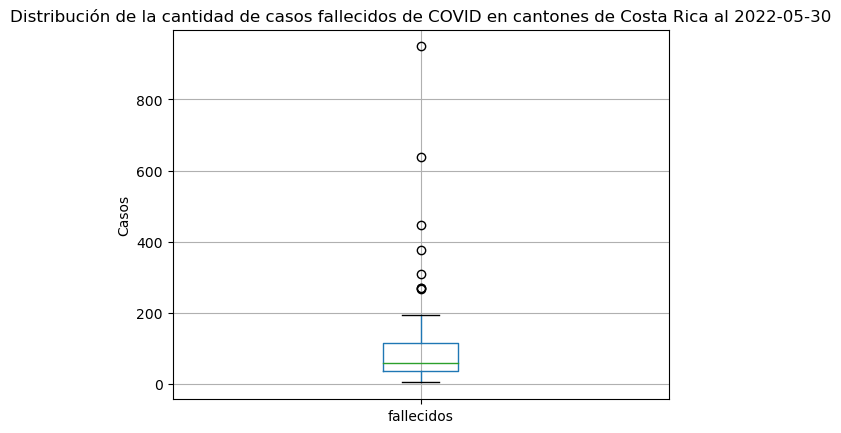

In [20]:
# Gráfico de caja de casos fallecidos en cantones
covid_cantonal_fallecidos.boxplot(column="fallecidos")

# Título y etiquetas en los ejes
plt.title("Distribución de la cantidad de casos fallecidos de COVID en cantones de Costa Rica al 2022-05-30")
plt.ylabel("Casos")

Text(0, 0.5, 'Edad')

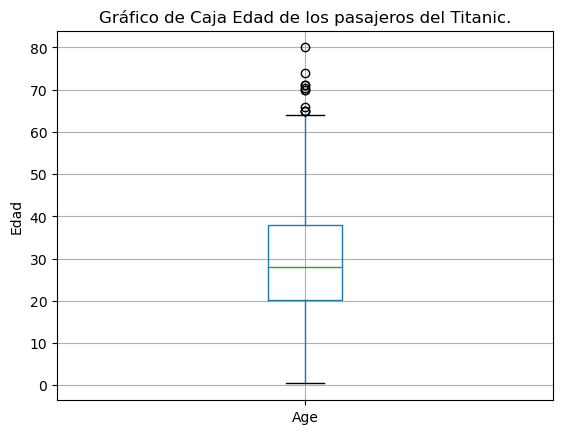

In [21]:
# Gráfico de caja 
titanic.boxplot(column="Age")

# Título y etiquetas en los ejes
plt.title("Gráfico de Caja Edad de los pasajeros del Titanic.")
plt.ylabel("Edad")


In [ ]:
# Subconjunto de cantones de la provincia de Limón
covid_limon_positivos = covid_cantonal_positivos[covid_cantonal_positivos["provincia"] == "Limón"]

In [ ]:
covid_limon_positivos


Text(0, 0.5, 'Casos')

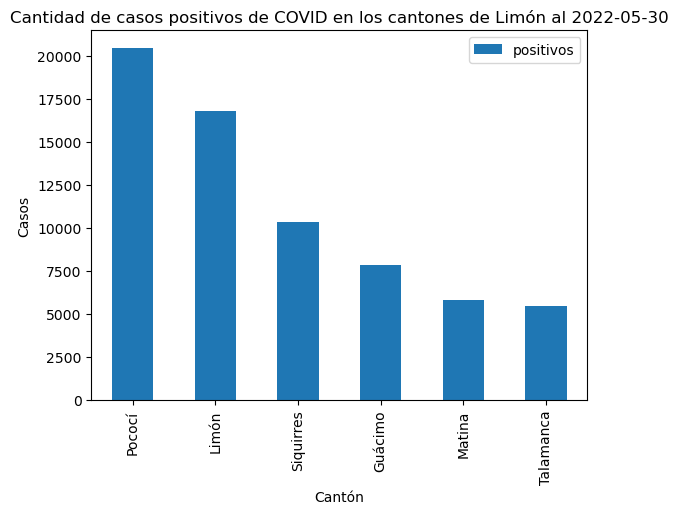

In [22]:
# Subconjunto de cantones de la provincia de Limón
covid_limon_positivos = covid_cantonal_positivos[covid_cantonal_positivos["provincia"] == "Limón"]

# Se establece la columna "canton" como índice del dataframe
# y este se ordena por la cantidad de casos positivos antes de
# hacer el gráfico con plot.bar()
covid_limon_positivos.set_index("canton") \
                     .sort_values(by="positivos", ascending=False) \
                     .plot.bar()

plt.title("Cantidad de casos positivos de COVID en los cantones de Limón al 2022-05-30")
plt.xlabel("Cantón")
plt.ylabel("Casos")

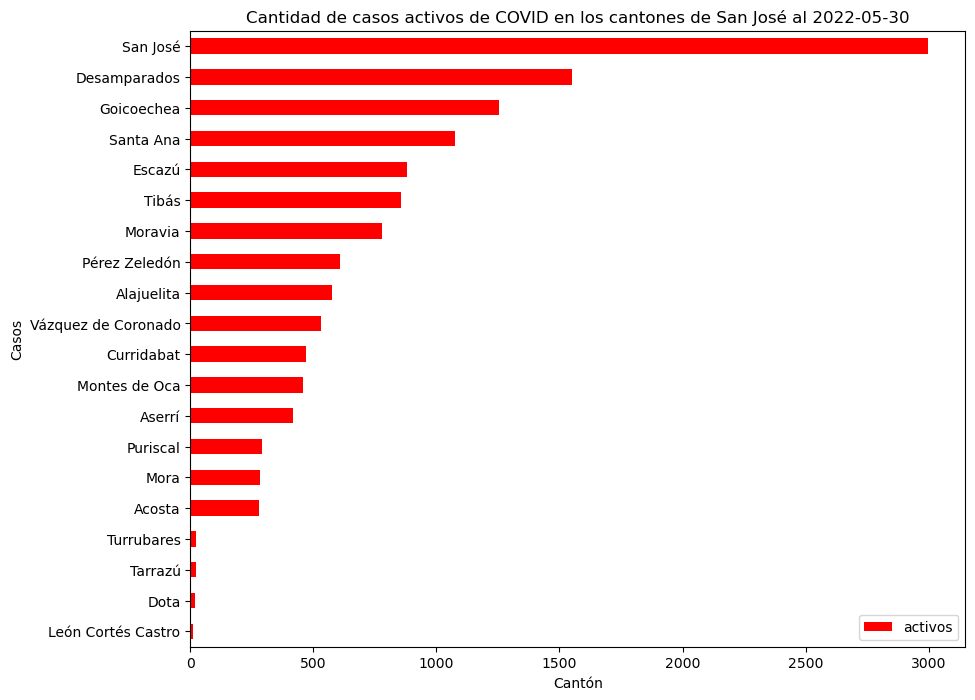

In [39]:
# Subconjunto de cantones de la provincia de San José
covid_sanjose_activos = covid_cantonal_activos[covid_cantonal_activos["provincia"] == "San José"]

# Se establece la columna "canton" como índice del dataframe
# y este se ordena por la cantidad de casos antes de
# hacer el gráfico con plot.barh().
# También se establece el tamaño del gráfico con figsize()
covid_sanjose_activos.set_index("canton").sort_values(by="activos").plot.barh(color="red", figsize=(10, 8))

plt.title("Cantidad de casos activos de COVID en los cantones de San José al 2022-05-30")
plt.xlabel("Cantón")
plt.ylabel("Casos")
plt.legend(loc="lower right")

In [41]:
# Suma de casos positivos por provincia
covid_provincial_positivos = covid_cantonal_positivos.groupby(["provincia"], as_index=False)["positivos"] \
                                                     .sum()
covid_provincial_positivos



,provincia,positivos
0,Alajuela,179754.0
1,Cartago,92933.0
2,Guanacaste,61470.0
3,Heredia,100766.0
4,Limón,66752.0
5,Puntarenas,86938.0
6,San José,315969.0


Text(0, 0.5, 'Casos')

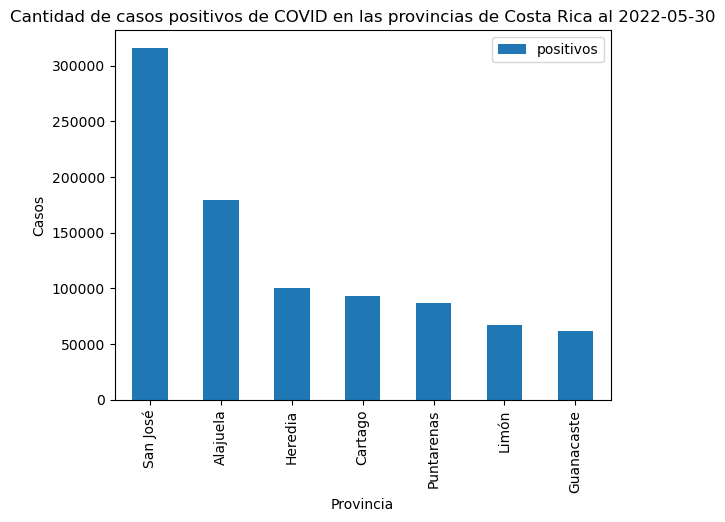

In [42]:
# Se establece la columna "provincia" como índice del dataframe
# y este se ordena por la cantidad de casos positivos antes de
# hacer el gráfico con plot.bar()
covid_provincial_positivos.set_index("provincia") \
                          .sort_values(by="positivos", ascending=False) \
                          .plot.bar()

plt.title("Cantidad de casos positivos de COVID en las provincias de Costa Rica al 2022-05-30")
plt.xlabel("Provincia")
plt.ylabel("Casos")

Text(0, 0.5, 'Proporción de sobrevivientes')

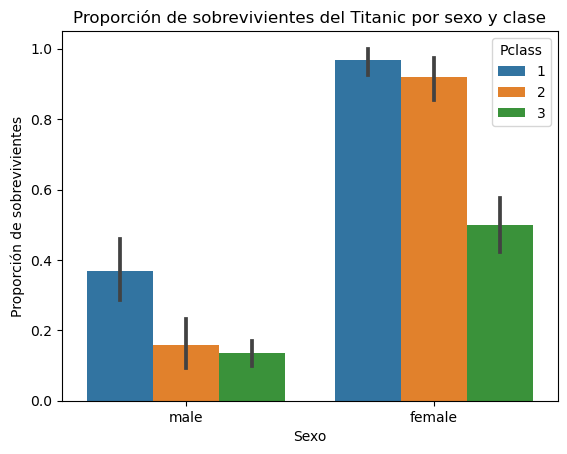

In [43]:
# Gráfico de barras
sns.barplot(data=titanic, x="Sex", y="Survived", hue="Pclass")

plt.title("Proporción de sobrevivientes del Titanic por sexo y clase")
plt.xlabel("Sexo")
plt.ylabel("Proporción de sobrevivientes")